In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras 
from xgboost import XGBRegressor
import os

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df= pd.read_csv("C:/Users/Paa Kwasi/Downloads/ift.csv")

# Dropping the null values and checking the dataypes 

In [3]:
df.dropna(inplace=True)
df.dtypes

Temperature    float64
Pressure       float64
Methane        float64
Nitrogen       float64
M1_conc        float64
M2_conc        float64
Salttype        object
D_change       float64
Phase           object
IFT            float64
dtype: object

##  Looking at the statistics

In [4]:
import seaborn as sns

In [5]:
df.describe()

,Temperature,Pressure,Methane,Nitrogen,M1_conc,M2_conc,D_change,IFT
count,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000
mean,75.275965,16.492740,3.735990,6.741936,0.739823,0.590028,0.653853,40.711513
std,39.820374,13.050292,14.502853,18.480021,1.263320,1.278646,0.296067,11.978374
min,5.250000,0.100000,0.000000,0.000000,0.000000,0.000000,0.012192,12.400000
25%,40.000000,6.182500,0.000000,0.000000,0.000000,0.000000,0.388625,31.150000
50%,70.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.731555,38.175000
75%,100.000000,20.965000,0.000000,0.000000,0.980000,0.045000,0.906625,48.645000
max,196.250000,69.510000,80.000000,76.360000,4.950000,5.000000,1.273900,76.100000


<AxesSubplot:>

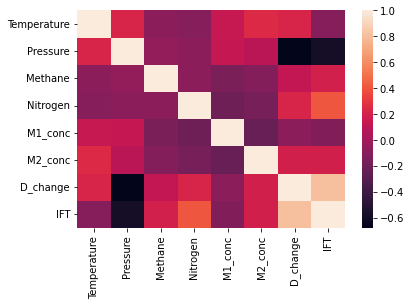

In [6]:
sns.heatmap(df.corr())

In [7]:
df.columns

Index(['Temperature', 'Pressure', 'Methane', 'Nitrogen', 'M1_conc', 'M2_conc',
       'Salttype', 'D_change', 'Phase', 'IFT'],
      dtype='object')

# Separating the x and y variables and splitting train and test 

In [8]:
X= df. drop(['Salttype','Phase',"D_change",'IFT'],axis=1).astype(float)

In [9]:
y=df.IFT.astype(float)

## Looking at the test and train shape on their axis and looking at random state

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.7,random_state=5)

In [11]:
X_train.shape, y_train.shape

((1124, 6), (1124,))

## Normalization  

In [12]:
scaler= MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Looking at Linear regression

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
lr.score(X_train,y_train)

0.6307434865497916

In [15]:
lr.score(X_test,y_test)

0.6744796154960626

# Writing a random_state hypothesis 

In [16]:
random_state= np.arange(50)
test_score=[]
train_score=[]
train_mse=[]
test_mse=[]
for i in random_state:
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.7,random_state=i)
    scaler= MinMaxScaler()
    X_train= scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    test_score.append(lr.score(X_test,y_test))
    train_score.append(lr.score(X_train,y_train))
    test_mse.append(mean_squared_error(y_test,lr.predict(X_test)))
    train_mse.append(mean_squared_error(y_train,lr.predict(X_train)))

In [17]:
test=np.array(test_score)
train=np.array(train_score)
tr_mse=np.array(train_mse)
te_mse=np.array(test_mse)

In [18]:
np.argmin(te_mse),np.min(te_mse),np.mean(te_mse)

(20, 46.32825544274388, 51.08440053430556)

In [19]:
np.max(test), np.argmax(test), np.mean(test) #test score statistics

(0.6781749734342215, 23, 0.6446455270806074)

In [20]:
np.max(train), np.min(train),np.argmax(train), np.mean(train)

(0.6634474575781533, 0.6282306299149132, 14, 0.6433170361335803)

# SVM 

In [21]:
random_state= np.arange(50)
test_score=[]
train_score=[]
train_mse=[]
test_mse=[]
for i in random_state:
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.7,random_state=i)
    scaler= MinMaxScaler()
    X_train= scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    from sklearn.svm import SVR
    from sklearn.metrics import mean_squared_error
    lr=SVR()
    lr.fit(X_train,y_train)
    test_score.append(lr.score(X_test,y_test))
    train_score.append(lr.score(X_train,y_train))
    test_mse.append(mean_squared_error(y_test,lr.predict(X_test)))
    train_mse.append(mean_squared_error(y_train,lr.predict(X_train)))

In [22]:
test=np.array(test_score)
train=np.array(train_score)
tr_mse=np.array(train_mse)
te_mse=np.array(test_mse)

In [23]:
np.max(test),np.mean(test),np.argmax(test)

(0.7710190691976045, 0.7278072204250476, 5)

In [24]:
np.max(train),np.mean(train),np.argmax(train)

(0.7591833925670004, 0.7351780483172345, 29)

## Using Random state 5 which two models agree is the best combination of data to test for Xgboost 

In [25]:
X_gtrain,X_gtest,y_gtrain,y_gtest=train_test_split(X,y,random_state=5, train_size=0.7)

In [26]:
X_gtrain=scaler.fit_transform(X_gtrain)
X_gtest=scaler.transform(X_gtest)

In [27]:
xgbr=XGBRegressor(learning_rate=0.301, reg_lambda=1,max_depth=6) # kept the hyperparameters standard.

In [28]:
xgbr.fit(X_gtrain,y_gtrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.301, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [29]:
xgbr.score(X_gtrain,y_gtrain) #clear overfit of data

0.9992278858499097

In [30]:
xgbr.score(X_gtest,y_gtest) # clear overfit of data but good results

0.9834079677426696

### Checking Mean squared error for the eXtreme Gradient Boosting xgboost

In [31]:
x_t=xgbr.predict(X_gtest)

In [32]:
mean_squared_error(y_gtest,x_t) # cost of test data

2.421399126471648

In [33]:
mean_squared_error(y_gtrain,xgbr.predict(X_gtrain))# cost of train data

0.10987196424480139

In [34]:
X_gtest.shape, y_test.shape

((482, 6), (482,))

# Testing the IFT using unseen data to test effectiveness 

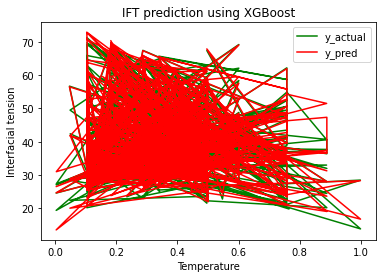

In [35]:
plt.figure()
plt.plot(X_gtest[:,0],y_gtest,'green', label='y_actual')
plt.plot(X_gtest[:,0],x_t,'red', label='y_pred')
plt.legend(loc=1)
plt.xlabel("Temperature")
plt.ylabel("Interfacial tension")
plt.title("IFT prediction using XGBoost")
plt.show()

# Using a Neural Network to test Interfacial tension 

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


In [50]:
model=Sequential([
    Dense(100,'relu',kernel_regularizer=l2(0.01)),
    Dense(200,'relu', kernel_regularizer=l2(0.01)),
    Dense(300,'relu', kernel_regularizer=l2(0.1)),
    Dense(400,'relu'),
    Dense(1,'linear')
])

In [51]:
model.compile(optimizer=Adam(0.01),loss='mse', metrics=['mse','mae'])

# splitting the data

In [52]:
X_nntrain,X_nntest,y_nntrain,y_nntest=train_test_split(X,y,random_state=5, train_size=0.7)
X_ntrain=scaler.fit_transform(X_nntrain)
X_ntest=scaler.transform(X_nntest)
        
    

In [53]:
class Mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('loss')<1.4:
            self.model.stop_training=True

In [54]:
history=model.fit(X_ntrain,y_nntrain,epochs=2000, callbacks=Mycallback())

Epoch 1/2000
36/36 [==============================] - 1s 3ms/step - loss: 421.4663 - mse: 409.4847 - mae: 14.7958
Epoch 2/2000
36/36 [==============================] - 0s 3ms/step - loss: 51.7630 - mse: 43.0759 - mae: 4.9439
Epoch 3/2000
36/36 [==============================] - 0s 4ms/step - loss: 39.5638 - mse: 32.0871 - mae: 4.0657
Epoch 4/2000
36/36 [==============================] - 0s 3ms/step - loss: 33.0666 - mse: 26.3418 - mae: 3.6190
Epoch 5/2000
36/36 [==============================] - 0s 3ms/step - loss: 25.9920 - mse: 19.9091 - mae: 3.2723
Epoch 6/2000
36/36 [==============================] - 0s 3ms/step - loss: 22.7320 - mse: 17.1922 - mae: 2.9991
Epoch 7/2000
36/36 [==============================] - 0s 3ms/step - loss: 20.5720 - mse: 15.5716 - mae: 2.8675
Epoch 8/2000
36/36 [==============================] - 0s 4ms/step - loss: 20.1742 - mse: 15.7470 - mae: 2.8642
Epoch 9/2000
36/36 [==============================] - 0s 3ms/step - loss: 22.1450 - mse: 18.1642 - mae: 3.156

36/36 [==============================] - 0s 4ms/step - loss: 12.3998 - mse: 11.0503 - mae: 2.1884
Epoch 75/2000
36/36 [==============================] - 0s 4ms/step - loss: 13.2344 - mse: 11.8636 - mae: 2.3866
Epoch 76/2000
36/36 [==============================] - 0s 4ms/step - loss: 14.5885 - mse: 13.2388 - mae: 2.5938
Epoch 77/2000
36/36 [==============================] - 0s 3ms/step - loss: 18.0299 - mse: 16.7002 - mae: 3.0276
Epoch 78/2000
36/36 [==============================] - 0s 4ms/step - loss: 11.9213 - mse: 10.5602 - mae: 2.1496
Epoch 79/2000
36/36 [==============================] - 0s 4ms/step - loss: 15.2827 - mse: 13.9498 - mae: 2.6975
Epoch 80/2000
36/36 [==============================] - 0s 3ms/step - loss: 13.5650 - mse: 12.2486 - mae: 2.4448
Epoch 81/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.8082 - mse: 9.4884 - mae: 1.9771
Epoch 82/2000
36/36 [==============================] - 0s 4ms/step - loss: 11.3788 - mse: 10.0788 - mae: 2.0719
Epoch 8

36/36 [==============================] - 0s 4ms/step - loss: 14.3053 - mse: 13.1700 - mae: 2.6160
Epoch 148/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.9016 - mse: 9.7557 - mae: 2.0576
Epoch 149/2000
36/36 [==============================] - 0s 4ms/step - loss: 11.9240 - mse: 10.7760 - mae: 2.2055
Epoch 150/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.8126 - mse: 9.6693 - mae: 2.0290
Epoch 151/2000
36/36 [==============================] - 0s 5ms/step - loss: 10.4443 - mse: 9.3043 - mae: 1.9327
Epoch 152/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.7509 - mse: 9.6131 - mae: 1.9691
Epoch 153/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.5114 - mse: 9.3765 - mae: 1.9587
Epoch 154/2000
36/36 [==============================] - 0s 3ms/step - loss: 11.7115 - mse: 10.5739 - mae: 2.1365
Epoch 155/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.2455 - mse: 9.1099 - mae: 1.8870
Epoc

36/36 [==============================] - 0s 4ms/step - loss: 11.0747 - mse: 9.9686 - mae: 2.0585
Epoch 221/2000
36/36 [==============================] - 0s 3ms/step - loss: 11.0700 - mse: 9.9658 - mae: 2.0456
Epoch 222/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.5388 - mse: 9.4420 - mae: 1.9729
Epoch 223/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.4435 - mse: 9.3580 - mae: 1.9582
Epoch 224/2000
36/36 [==============================] - 0s 3ms/step - loss: 15.2386 - mse: 14.1357 - mae: 2.7792
Epoch 225/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.6752 - mse: 9.5671 - mae: 2.0213
Epoch 226/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.0460 - mse: 8.9373 - mae: 1.8918
Epoch 227/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.4163 - mse: 9.3131 - mae: 1.9836
Epoch 228/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.9473 - mse: 9.8505 - mae: 2.0200
Epoch 

36/36 [==============================] - 0s 3ms/step - loss: 10.4978 - mse: 9.3879 - mae: 1.9558
Epoch 294/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.1047 - mse: 8.9891 - mae: 1.8807
Epoch 295/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.3105 - mse: 9.2017 - mae: 1.9639
Epoch 296/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.7515 - mse: 9.6496 - mae: 2.0799
Epoch 297/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.9633 - mse: 9.8677 - mae: 2.0736
Epoch 298/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.5407 - mse: 9.4439 - mae: 1.9191
Epoch 299/2000
36/36 [==============================] - 0s 3ms/step - loss: 12.1855 - mse: 11.0762 - mae: 2.3124
Epoch 300/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.0176 - mse: 8.9157 - mae: 1.8447
Epoch 301/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.3743 - mse: 9.2742 - mae: 1.9631
Epoch 

36/36 [==============================] - 0s 3ms/step - loss: 10.5925 - mse: 9.4390 - mae: 2.0018
Epoch 367/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.0549 - mse: 8.9035 - mae: 1.8797
Epoch 368/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.8784 - mse: 8.7211 - mae: 1.8331
Epoch 369/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.7854 - mse: 9.6245 - mae: 2.0440
Epoch 370/2000
36/36 [==============================] - 0s 3ms/step - loss: 11.1336 - mse: 9.9816 - mae: 2.1062
Epoch 371/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.4137 - mse: 9.2688 - mae: 1.9533
Epoch 372/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.5353 - mse: 9.3784 - mae: 1.9404
Epoch 373/2000
36/36 [==============================] - 0s 3ms/step - loss: 11.6903 - mse: 10.5404 - mae: 2.1444
Epoch 374/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.8205 - mse: 9.6627 - mae: 2.0510
Epoch 3

36/36 [==============================] - 0s 4ms/step - loss: 9.8223 - mse: 8.6511 - mae: 1.8558
Epoch 440/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.8064 - mse: 9.6449 - mae: 1.9878
Epoch 441/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.6921 - mse: 9.5264 - mae: 1.9967
Epoch 442/2000
36/36 [==============================] - 0s 3ms/step - loss: 11.3168 - mse: 10.1457 - mae: 2.1926
Epoch 443/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.2326 - mse: 9.0600 - mae: 1.9674
Epoch 444/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.4820 - mse: 9.3118 - mae: 1.9841
Epoch 445/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.8699 - mse: 9.6969 - mae: 2.0419
Epoch 446/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.0671 - mse: 8.8860 - mae: 1.8795
Epoch 447/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.9463 - mse: 8.7748 - mae: 1.8776
Epoch 44

36/36 [==============================] - 0s 3ms/step - loss: 9.9287 - mse: 8.7461 - mae: 1.8632
Epoch 513/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.9315 - mse: 8.7462 - mae: 1.8900
Epoch 514/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.6504 - mse: 9.4705 - mae: 1.9929
Epoch 515/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.8012 - mse: 9.6174 - mae: 2.0010
Epoch 516/2000
36/36 [==============================] - 0s 3ms/step - loss: 11.1488 - mse: 9.9622 - mae: 2.0984
Epoch 517/2000
36/36 [==============================] - 0s 3ms/step - loss: 11.7801 - mse: 10.5870 - mae: 2.1913
Epoch 518/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.8080 - mse: 9.6238 - mae: 2.0527
Epoch 519/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.5546 - mse: 9.3753 - mae: 2.0050
Epoch 520/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.0914 - mse: 8.9066 - mae: 1.9067
Epoch 52

36/36 [==============================] - 0s 3ms/step - loss: 10.6730 - mse: 9.4664 - mae: 2.0099
Epoch 586/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.4014 - mse: 9.1899 - mae: 1.9475
Epoch 587/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.8067 - mse: 8.6020 - mae: 1.8573
Epoch 588/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.2393 - mse: 9.0266 - mae: 1.9026
Epoch 589/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.9181 - mse: 8.7042 - mae: 1.9009
Epoch 590/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.7035 - mse: 8.4973 - mae: 1.8107
Epoch 591/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.9654 - mse: 8.7636 - mae: 1.8172
Epoch 592/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.7427 - mse: 8.5366 - mae: 1.8036
Epoch 593/2000
36/36 [==============================] - 0s 3ms/step - loss: 12.8254 - mse: 11.6289 - mae: 2.4112
Epoch 594/2

36/36 [==============================] - 0s 3ms/step - loss: 9.9565 - mse: 8.7491 - mae: 1.8581
Epoch 659/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.5247 - mse: 8.3278 - mae: 1.7852
Epoch 660/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.6697 - mse: 8.4723 - mae: 1.8017
Epoch 661/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.8440 - mse: 9.6468 - mae: 2.0776
Epoch 662/2000
36/36 [==============================] - 0s 3ms/step - loss: 11.3264 - mse: 10.1295 - mae: 2.1084
Epoch 663/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.0268 - mse: 8.8135 - mae: 1.8612
Epoch 664/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.0752 - mse: 8.8687 - mae: 1.8600
Epoch 665/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.5320 - mse: 8.3212 - mae: 1.7796
Epoch 666/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.7125 - mse: 8.5033 - mae: 1.8099
Epoch 667/2

36/36 [==============================] - 0s 3ms/step - loss: 10.1979 - mse: 9.0188 - mae: 1.9148
Epoch 732/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.0372 - mse: 8.8595 - mae: 1.8493
Epoch 733/2000
36/36 [==============================] - 0s 3ms/step - loss: 11.1093 - mse: 9.9286 - mae: 2.1171
Epoch 734/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.2570 - mse: 9.0579 - mae: 1.9079
Epoch 735/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.6169 - mse: 8.4166 - mae: 1.7767
Epoch 736/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.5738 - mse: 8.3756 - mae: 1.7503
Epoch 737/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.4547 - mse: 8.2630 - mae: 1.7766
Epoch 738/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.8308 - mse: 8.6366 - mae: 1.8297
Epoch 739/2000
36/36 [==============================] - 0s 3ms/step - loss: 11.1412 - mse: 9.9495 - mae: 2.1164
Epoch 740/2

36/36 [==============================] - 0s 3ms/step - loss: 9.5230 - mse: 8.3264 - mae: 1.7843
Epoch 805/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.6540 - mse: 9.4651 - mae: 1.9879
Epoch 806/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.8139 - mse: 8.6356 - mae: 1.8612
Epoch 807/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.1130 - mse: 8.9320 - mae: 1.9156
Epoch 808/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.6909 - mse: 8.5078 - mae: 1.8154
Epoch 809/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.8451 - mse: 8.6591 - mae: 1.8291
Epoch 810/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.3802 - mse: 9.2033 - mae: 1.9387
Epoch 811/2000
36/36 [==============================] - 0s 3ms/step - loss: 11.0150 - mse: 9.8218 - mae: 2.1306
Epoch 812/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.5081 - mse: 9.3161 - mae: 1.9870
Epoch 813/2

36/36 [==============================] - 0s 3ms/step - loss: 9.5720 - mse: 8.3881 - mae: 1.8072
Epoch 878/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.1409 - mse: 8.9528 - mae: 1.9425
Epoch 879/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.4432 - mse: 9.2536 - mae: 1.9803
Epoch 880/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.8913 - mse: 9.7038 - mae: 2.0016
Epoch 881/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.4426 - mse: 8.2491 - mae: 1.7475
Epoch 882/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.8423 - mse: 8.6551 - mae: 1.8275
Epoch 883/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.6927 - mse: 8.5149 - mae: 1.8683
Epoch 884/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.3595 - mse: 9.1837 - mae: 1.9110
Epoch 885/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.3003 - mse: 9.1285 - mae: 2.0207
Epoch 886/2

36/36 [==============================] - 0s 4ms/step - loss: 9.8560 - mse: 8.6622 - mae: 1.8622
Epoch 951/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.3616 - mse: 9.1675 - mae: 1.9876
Epoch 952/2000
36/36 [==============================] - 0s 3ms/step - loss: 13.6035 - mse: 12.4199 - mae: 2.5348
Epoch 953/2000
36/36 [==============================] - 0s 3ms/step - loss: 11.5980 - mse: 10.4008 - mae: 2.2366
Epoch 954/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.1403 - mse: 8.9428 - mae: 1.8981
Epoch 955/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.9098 - mse: 8.7148 - mae: 1.8664
Epoch 956/2000
36/36 [==============================] - 0s 3ms/step - loss: 11.8236 - mse: 10.6336 - mae: 2.1693
Epoch 957/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.6615 - mse: 8.4606 - mae: 1.8182
Epoch 958/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.6380 - mse: 8.4423 - mae: 1.7943
Epoch 95

36/36 [==============================] - 0s 4ms/step - loss: 9.1509 - mse: 7.9669 - mae: 1.6918
Epoch 1024/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.6720 - mse: 9.4891 - mae: 2.0237
Epoch 1025/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.4945 - mse: 9.3215 - mae: 1.9036
Epoch 1026/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.0592 - mse: 8.8861 - mae: 1.8618
Epoch 1027/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.6427 - mse: 9.4698 - mae: 2.0136
Epoch 1028/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.3553 - mse: 9.1675 - mae: 1.9549
Epoch 1029/2000
36/36 [==============================] - 0s 3ms/step - loss: 11.5205 - mse: 10.3259 - mae: 2.1730
Epoch 1030/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.8330 - mse: 8.6352 - mae: 1.8461
Epoch 1031/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.7263 - mse: 8.5313 - mae: 1.8282
E

36/36 [==============================] - 0s 4ms/step - loss: 9.9174 - mse: 8.7282 - mae: 1.8832
Epoch 1096/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.7249 - mse: 8.5340 - mae: 1.7988
Epoch 1097/2000
36/36 [==============================] - 0s 4ms/step - loss: 11.1961 - mse: 10.0020 - mae: 2.1551
Epoch 1098/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.7945 - mse: 9.5974 - mae: 2.0429
Epoch 1099/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.7423 - mse: 8.5506 - mae: 1.8331
Epoch 1100/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.7379 - mse: 8.5411 - mae: 1.8167
Epoch 1101/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.0535 - mse: 8.8551 - mae: 1.9108
Epoch 1102/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.0151 - mse: 8.8287 - mae: 1.8834
Epoch 1103/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.3643 - mse: 9.1718 - mae: 1.9698
Ep

36/36 [==============================] - 0s 5ms/step - loss: 10.7666 - mse: 9.5728 - mae: 2.0008
Epoch 1169/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.1848 - mse: 8.9848 - mae: 1.8945
Epoch 1170/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.0638 - mse: 8.8552 - mae: 1.8934
Epoch 1171/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.6737 - mse: 8.4740 - mae: 1.7765
Epoch 1172/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.9664 - mse: 8.7759 - mae: 1.8851
Epoch 1173/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.9384 - mse: 8.7510 - mae: 1.8882
Epoch 1174/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.2831 - mse: 9.0965 - mae: 1.9701
Epoch 1175/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.8080 - mse: 8.6230 - mae: 1.8732
Epoch 1176/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.7659 - mse: 8.5812 - mae: 1.8087
Epoc

36/36 [==============================] - 0s 4ms/step - loss: 10.5775 - mse: 9.3795 - mae: 1.9636
Epoch 1241/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.8337 - mse: 8.6214 - mae: 1.8062
Epoch 1242/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.4435 - mse: 8.2239 - mae: 1.7510
Epoch 1243/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.8383 - mse: 8.6249 - mae: 1.8511
Epoch 1244/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.7960 - mse: 8.5841 - mae: 1.8222
Epoch 1245/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.4603 - mse: 8.2493 - mae: 1.7606
Epoch 1246/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.6652 - mse: 8.4583 - mae: 1.8078
Epoch 1247/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.4585 - mse: 8.2510 - mae: 1.7426
Epoch 1248/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.9192 - mse: 8.7193 - mae: 1.8480
Epoch 1

Epoch 1313/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.7567 - mse: 8.5676 - mae: 1.8544
Epoch 1314/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.4077 - mse: 8.2088 - mae: 1.7717
Epoch 1315/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.3931 - mse: 9.1930 - mae: 1.9821
Epoch 1316/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.7746 - mse: 9.5740 - mae: 2.0582
Epoch 1317/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.3354 - mse: 9.1355 - mae: 1.9307
Epoch 1318/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.8203 - mse: 8.6161 - mae: 1.8689
Epoch 1319/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.6560 - mse: 8.4553 - mae: 1.8089
Epoch 1320/2000
36/36 [==============================] - 0s 4ms/step - loss: 11.0458 - mse: 9.8412 - mae: 2.1185
Epoch 1321/2000
36/36 [==============================] - 0s 5ms/step - loss: 10.3008 - mse: 9.1040 -

36/36 [==============================] - 0s 4ms/step - loss: 10.5950 - mse: 9.3720 - mae: 2.0355
Epoch 1386/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.6311 - mse: 8.4140 - mae: 1.7908
Epoch 1387/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.0365 - mse: 8.8216 - mae: 1.8768
Epoch 1388/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.5216 - mse: 8.3098 - mae: 1.7844
Epoch 1389/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.3337 - mse: 9.1225 - mae: 1.9247
Epoch 1390/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.0911 - mse: 8.8824 - mae: 1.9006
Epoch 1391/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.8829 - mse: 8.6730 - mae: 1.8868
Epoch 1392/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.4322 - mse: 8.2168 - mae: 1.7711
Epoch 1393/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.5212 - mse: 8.3100 - mae: 1.7907
Epoc

36/36 [==============================] - 0s 4ms/step - loss: 10.1699 - mse: 8.9491 - mae: 1.9168
Epoch 1458/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.3160 - mse: 9.0957 - mae: 1.8794
Epoch 1459/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.6777 - mse: 8.4545 - mae: 1.7969
Epoch 1460/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.9959 - mse: 8.7773 - mae: 1.9070
Epoch 1461/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.5396 - mse: 9.3168 - mae: 1.9338
Epoch 1462/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.4809 - mse: 8.2484 - mae: 1.7532
Epoch 1463/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.2005 - mse: 8.9656 - mae: 1.9381
Epoch 1464/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.5689 - mse: 9.3400 - mae: 2.0071
Epoch 1465/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.2805 - mse: 9.0494 - mae: 1.9584
Ep

36/36 [==============================] - 0s 5ms/step - loss: 9.9380 - mse: 8.7277 - mae: 1.8730
Epoch 1530/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.4870 - mse: 9.2830 - mae: 1.9604
Epoch 1531/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.9686 - mse: 8.7607 - mae: 1.9157
Epoch 1532/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.2894 - mse: 9.0788 - mae: 1.8896
Epoch 1533/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.7154 - mse: 8.5091 - mae: 1.8152
Epoch 1534/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.6376 - mse: 8.4276 - mae: 1.8411
Epoch 1535/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.6660 - mse: 8.4644 - mae: 1.8307
Epoch 1536/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.5733 - mse: 8.3679 - mae: 1.7980
Epoch 1537/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.8046 - mse: 8.6061 - mae: 1.8092
Epoch 

36/36 [==============================] - 0s 4ms/step - loss: 10.6050 - mse: 9.4104 - mae: 1.9365
Epoch 1603/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.9851 - mse: 9.7661 - mae: 2.0389
Epoch 1604/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.3063 - mse: 9.1050 - mae: 1.9434
Epoch 1605/2000
36/36 [==============================] - 0s 3ms/step - loss: 11.0968 - mse: 9.9068 - mae: 2.0393
Epoch 1606/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.7107 - mse: 8.5253 - mae: 1.8406
Epoch 1607/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.7124 - mse: 8.5150 - mae: 1.8412
Epoch 1608/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.2191 - mse: 8.0245 - mae: 1.7235
Epoch 1609/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.5616 - mse: 8.3675 - mae: 1.7914
Epoch 1610/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.7639 - mse: 8.5620 - mae: 1.8335
Epoc

Epoch 1675/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.1026 - mse: 8.9054 - mae: 1.8883
Epoch 1676/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.9396 - mse: 9.7476 - mae: 2.0134
Epoch 1677/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.8772 - mse: 8.6752 - mae: 1.8671
Epoch 1678/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.8707 - mse: 8.6640 - mae: 1.8512
Epoch 1679/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.1911 - mse: 8.9832 - mae: 1.8669
Epoch 1680/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.1004 - mse: 8.8901 - mae: 1.8839
Epoch 1681/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.8241 - mse: 8.6112 - mae: 1.8259
Epoch 1682/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.8783 - mse: 8.6605 - mae: 1.8281
Epoch 1683/2000
36/36 [==============================] - 0s 4ms/step - loss: 11.1813 - mse: 9.9626 -

36/36 [==============================] - 0s 5ms/step - loss: 9.4194 - mse: 8.2094 - mae: 1.7110
Epoch 1748/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.2715 - mse: 8.0674 - mae: 1.7358
Epoch 1749/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.6890 - mse: 8.4904 - mae: 1.8137
Epoch 1750/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.5394 - mse: 8.3368 - mae: 1.7928
Epoch 1751/2000
36/36 [==============================] - 0s 4ms/step - loss: 11.5462 - mse: 10.3584 - mae: 2.1811
Epoch 1752/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.4086 - mse: 9.2105 - mae: 1.9665
Epoch 1753/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.8320 - mse: 8.6229 - mae: 1.7989
Epoch 1754/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.6668 - mse: 8.4563 - mae: 1.7861
Epoch 1755/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.6462 - mse: 8.4432 - mae: 1.8182
Epoch

36/36 [==============================] - 0s 4ms/step - loss: 9.6988 - mse: 8.4754 - mae: 1.7768
Epoch 1820/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.9420 - mse: 8.7203 - mae: 1.8622
Epoch 1821/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.3928 - mse: 8.1768 - mae: 1.7375
Epoch 1822/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.8648 - mse: 8.6474 - mae: 1.8088
Epoch 1823/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.8240 - mse: 8.6000 - mae: 1.8276
Epoch 1824/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.6583 - mse: 8.4370 - mae: 1.7902
Epoch 1825/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.6518 - mse: 8.4341 - mae: 1.7923
Epoch 1826/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.8184 - mse: 8.6009 - mae: 1.8299
Epoch 1827/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.3174 - mse: 9.1100 - mae: 1.9063
Epoch 1

36/36 [==============================] - 0s 4ms/step - loss: 9.6091 - mse: 8.3817 - mae: 1.7919
Epoch 1893/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.2444 - mse: 8.0177 - mae: 1.7171
Epoch 1894/2000
36/36 [==============================] - 0s 5ms/step - loss: 10.8691 - mse: 9.6523 - mae: 2.0919
Epoch 1895/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.3780 - mse: 9.1613 - mae: 1.9154
Epoch 1896/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.4992 - mse: 8.2811 - mae: 1.7630
Epoch 1897/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.7636 - mse: 8.5369 - mae: 1.8324
Epoch 1898/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.9980 - mse: 8.7779 - mae: 1.8389
Epoch 1899/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.7372 - mse: 8.5186 - mae: 1.8186
Epoch 1900/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.2600 - mse: 8.0424 - mae: 1.6976
Epoch 

36/36 [==============================] - 0s 4ms/step - loss: 11.2634 - mse: 10.0245 - mae: 2.0781
Epoch 1966/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.0263 - mse: 8.7944 - mae: 1.8769
Epoch 1967/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.9146 - mse: 8.6757 - mae: 1.8223
Epoch 1968/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.5706 - mse: 8.3372 - mae: 1.7955
Epoch 1969/2000
36/36 [==============================] - 0s 4ms/step - loss: 10.3664 - mse: 9.1394 - mae: 1.9175
Epoch 1970/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.9746 - mse: 8.7539 - mae: 1.8706
Epoch 1971/2000
36/36 [==============================] - 0s 4ms/step - loss: 9.8783 - mse: 8.6589 - mae: 1.8849
Epoch 1972/2000
36/36 [==============================] - 0s 3ms/step - loss: 10.0455 - mse: 8.8220 - mae: 1.9022
Epoch 1973/2000
36/36 [==============================] - 0s 3ms/step - loss: 9.6168 - mse: 8.3980 - mae: 1.7721
Epo

In [55]:
pd.DataFrame(history.history)

,loss,mse,mae
0,421.466339,409.484711,14.795845
1,51.763035,43.075851,4.943887
2,39.563824,32.087078,4.065676
3,33.066589,26.341793,3.618973
4,25.991976,19.909149,3.272287
...,...,...,...
1995,9.508501,8.300502,1.752595
1996,9.745047,8.537878,1.818111
1997,9.887223,8.687835,1.852177
1998,10.372531,9.169527,1.986757


In [56]:
from sklearn.metrics import r2_score
r2_score(y_nntest,model.predict(X_ntest)) #test

16/16 [==============================] - 0s 2ms/step


0.9347720863967264

In [57]:
r2_score(y_nntrain,model.predict(X_ntrain))

36/36 [==============================] - 0s 2ms/step


0.9450940030543681

In [45]:
#model.save("Interfacial_tension_model_without_d_change_and_cats.h5")

16/16 [==============================] - 0s 3ms/step


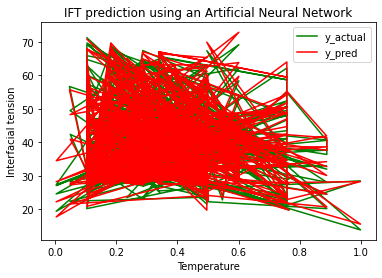

In [58]:
plt.figure()
plt.plot(X_ntest[:,0],y_nntest,'green', label='y_actual')
plt.plot(X_ntest[:,0],model.predict(X_ntest),'red', label='y_pred')
plt.legend(loc=1)
plt.xlabel("Temperature")
plt.ylabel("Interfacial tension")
plt.title("IFT prediction using an Artificial Neural Network")
plt.show()